In [9]:
import numpy as np
from PIL import Image

In [10]:
# --- 1. 定义图像参数 ---
# 定义我们想要的图像尺寸
height = 240
width = 320

In [11]:
# --- 2. 创建四通道 NumPy 数组 ---
# 创建一个形状为 (height, width, 4) 的 3D 数组
# 数组中的每个值都是 0 到 255 之间的无符号8位整数 (uint8)
# 这是图像的标准数据类型
# 4 个通道分别代表 R, G, B, A
rgba_array = np.zeros((height, width, 4), dtype=np.uint8)

In [12]:
# --- 3. 填充数组数据 (生成图像内容) ---
# 我们可以遍历每个像素，但使用 NumPy 的广播功能更高效

# 示例：创建一个复杂的渐变
# 创建一个从 0 到 255 的水平（宽度）渐变
x_gradient = np.linspace(0, 255, width, dtype=np.uint8)
# 创建一个从 0 到 255 的垂直（高度）渐变
y_gradient = np.linspace(0, 255, height, dtype=np.uint8)

# 通道 0 (Red): 填充水平渐变
# np.tile 会将 x_gradient 复制 'height' 次，以填充所有行
rgba_array[:, :, 0] = np.tile(x_gradient, (height, 1))

# 通道 1 (Green): 填充垂直渐变
# 我们需要将 y_gradient 变形为 (height, 1) 才能正确广播
rgba_array[:, :, 1] = np.tile(y_gradient[:, None], (1, width))

# 通道 2 (Blue): 设为一个恒定值，例如 128
rgba_array[:, :, 2] = 128

# 通道 3 (Alpha/透明度): 创建一个从左到右的透明渐变
# 255 = 完全不透明, 0 = 完全透明
alpha_gradient = np.linspace(255, 0, width, dtype=np.uint8)
rgba_array[:, :, 3] = np.tile(alpha_gradient, (height, 1))

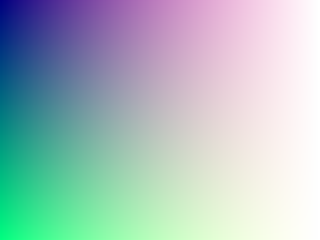

In [13]:
# --- 4. 从 NumPy 数组创建图像 ---
# 使用 Pillow 的 Image.fromarray() 方法
image = Image.fromarray(rgba_array)
image

In [14]:
# --- 5. 保存图像 ---
# 我们必须将图像保存为支持 Alpha 通道的格式，例如 PNG
# 像 JPEG (.jpg) 这样的格式不支持透明度
file_path = "generated_rgba_image.png"
image.save(file_path)